In [1]:
import importlib
import functions as functions
importlib.reload(functions)
from functions import get_images,prepro,centroid
from functions import draw_circle_and_calculate_intensity

In [2]:
data = get_images('../train/vort')


In [3]:
len(data)

10000

In [4]:
# preprocessed_data = []
# for i in range(len(data)):
#     preprocessed_data.append(prepro(data[i].squeeze()))
preprocessed_data = [data[i].squeeze() for i in range(len(data))]

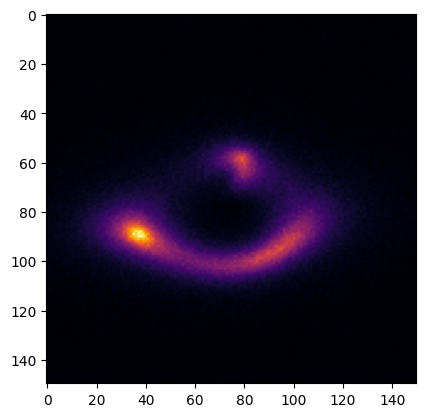

In [5]:
#plot preprocessed data
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(preprocessed_data[0],cmap='inferno')
plt.show()


In [6]:
centroids = []
for i in range(len(preprocessed_data)):
    # centroids.append(centroid(preprocessed_data[i]))
    centroids.append((75, 75))



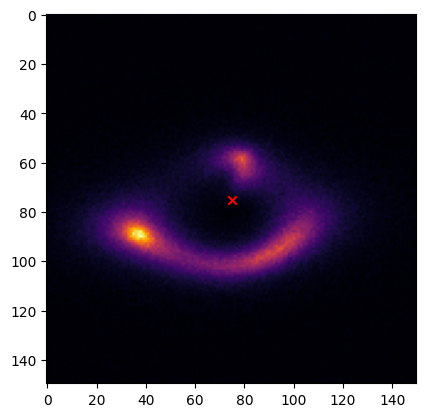

In [7]:
#plot image with centroid marked
plt.imshow(preprocessed_data[0],cmap='inferno')
plt.scatter(centroids[0][0],centroids[0][1],c='r',marker='x')
plt.show()


In [11]:
def normalize(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    print(min_val, max_val)
    normalized_arr = (arr - min_val) / (max_val - min_val)
    return normalized_arr  


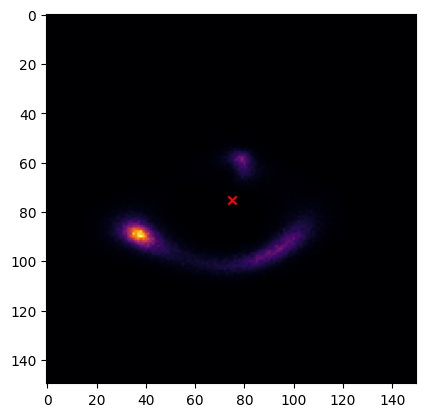

In [20]:
#plot image with centroid marked
plt.imshow(np.exp(preprocessed_data[0],order='F')-preprocessed_data[0],cmap='inferno')
plt.scatter(centroids[0][0],centroids[0][1],c='r',marker='x')
plt.show()


In [ ]:
#plot image with centroid marked
plt.imshow(preprocessed_data[0][np.exp(preprocessed_data[0],cmap='inferno')
plt.scatter(centroids[0][0],centroids[0][1],c='r',marker='x')
plt.show()

In [ ]:
from tqdm import tqdm


def find_intensity_eachset_vort(data, centroids,circle,title):
    vort_dict = {}
    for i in tqdm(range(len(data)), desc="Data PRocessing"):
        intensity_set = []
        for j in range(circle):
            intensity_values = draw_circle_and_calculate_intensity(data[i], (int(centroids[i][1]), int(centroids[i][0])), 4*j)
            intensity_set.append(intensity_values)
        
        vort_dict[title+'_'+str(i)] = intensity_set


    return vort_dict

In [ ]:
vort_dict = find_intensity_eachset_vort(preprocessed_data, centroids, 24, 'vort')

In [ ]:
vort_dict['vort_0']

In [ ]:
import numpy as np

# Assuming sphere_dict is your dictionary
values = list(vort_dict.values())
numpy_array = np.array(values)

print(numpy_array.shape)  # Should print (10000, 12, 360)

In [ ]:
import pickle

with open('vort.pkl', 'wb') as f:
    pickle.dump(numpy_array, f)